<a href="https://colab.research.google.com/github/Mrsnellek/MSDS_686_22F8W2/blob/23S8W1/MSDS%20686/Week_3/MNIST_Regularization_and_Dropout_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Digits Regularization and Dropout Assignment
## Adapted from Deep Learning with Python by Francois Chollet
#### Use the MNIST digit dataset to classify digits 0 - 9 into 10 different categories.  Use regularization and early stopping to improve your neural network.

In [1]:
# Import all the necessary libraries 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

2025-01-28 09:15:41.938573: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738023341.989254   13305 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738023342.003905   13305 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-28 09:15:42.132521: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Import the MNIST data set from the Keras library. https://keras.io/datasets/
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [3]:
# Reshape and normalize the images for your neural net

I'm gonna just add a scale and flatten layer to the model

In [4]:
# Convert the labels into categorical values.

I'd rather not. I'll use sparse categorical crossentropy loss.

In [5]:
# Split the data into training and validation

BATCH_SIZE = 128
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(BATCH_SIZE).prefetch(1)
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(10000, reshuffle_each_iteration=False)
val_ds = train_ds.skip(train_ds.cardinality().numpy() * .8).batch(BATCH_SIZE).prefetch(1)
train_ds = train_ds.take(train_ds.cardinality().numpy() * .8).shuffle(10000).batch(BATCH_SIZE).prefetch(1)
train_ds.cardinality().numpy() * BATCH_SIZE, val_ds.cardinality().numpy() * BATCH_SIZE, test_ds.cardinality().numpy() * BATCH_SIZE

I0000 00:00:1738023345.226871   13305 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10192 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070, pci bus id: 0000:10:00.0, compute capability: 8.9


(np.int64(48000), np.int64(12032), np.int64(10112))

## In each Jupyter Notebook cell build a model using your test and validation data, show loss and accuracy monitoring graphs, and evaluate your model on the test data *all in one cell*.  

## Build at least 7 different models. Use markdown above the code cell to explain what you are changing/testing in the subsequent model. 

## Build models with different learning rates, batch sizes, dropout, regularization, and hidden layers and nodes.  Be strategic in how you go about optimizing your model. The last model of your notebook should be your best model. 


I'm not going to evaluate each model on the test data, because that would mean overfitting the hyperparameters to the test data which will make the accuracy not generalize to new data. That's what the validation set is for, so that each model doesn't have be measured using the test set.

Epoch 1/10


I0000 00:00:1738023346.477356   13631 service.cc:148] XLA service 0x70a16c005220 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738023346.477493   13631 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4070, Compute Capability 8.9
2025-01-28 09:15:46.497260: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738023346.557124   13631 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-01-28 09:15:47.035854: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_102', 8 bytes spill stores, 8 bytes spill loads

2025-01-28 09:15:47.337968: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_102', 32 bytes spi

142/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7173 - loss: 1.0200

I0000 00:00:1738023349.852740   13631 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


330/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8023 - loss: 0.7203

2025-01-28 09:15:51.567400: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34', 32 bytes spill stores, 32 bytes spill loads

2025-01-28 09:15:51.711363: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34', 300 bytes spill stores, 300 bytes spill loads

2025-01-28 09:15:52.039168: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34', 8 bytes spill stores, 8 bytes spill loads

2025-01-28 09:15:52.068420: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34_0', 1072 bytes spill stores, 852 bytes spill loads

2025-01-28 09:15:52.248433: I external/local_xla/xla/stream_exe

375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8127 - loss: 0.6822 - val_accuracy: 0.9404 - val_loss: 0.2148
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9440 - loss: 0.2025 - val_accuracy: 0.9553 - val_loss: 0.1569
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9582 - loss: 0.1448 - val_accuracy: 0.9653 - val_loss: 0.1266
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9675 - loss: 0.1114 - val_accuracy: 0.9685 - val_loss: 0.1100
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9746 - loss: 0.0868 - val_accuracy: 0.9713 - val_loss: 0.1036
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9801 - loss: 0.0700 - val_accuracy: 0.9722 - val_loss: 0.0955
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9827 - loss: 0.0609 - val_accuracy: 0.9743 - val_loss: 0.0893
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9860 - loss: 0.0491 - val_accuracy: 0.9734 - val_

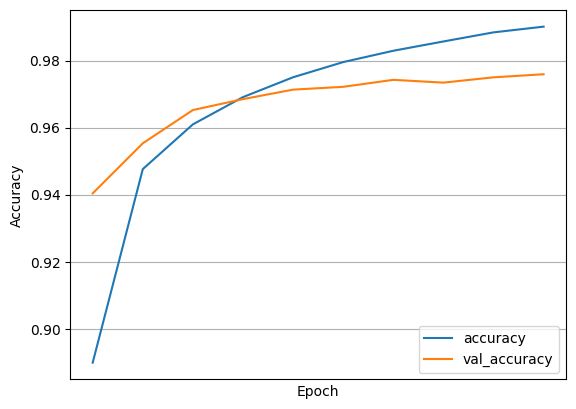

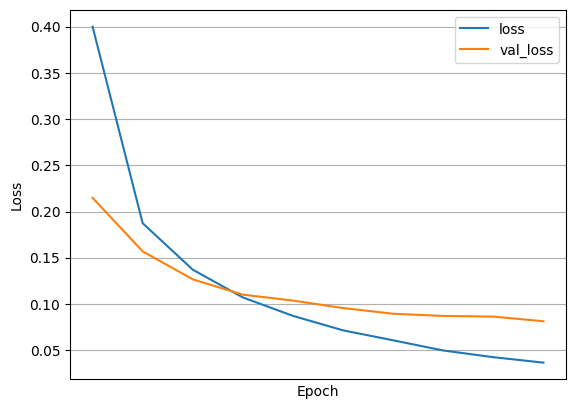

Best validation accuracy: 0.9759166836738586 at epoch 10


In [6]:
model1 = keras.Sequential()
model1.add(keras.layers.Input(shape=(28, 28)))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Rescaling(1./255))
model1.add(keras.layers.Dense(128, activation='relu'))
model1.add(keras.layers.Dense(10, activation='softmax'))

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model1.fit(train_ds, validation_data=val_ds, epochs=10)

# plot the training and validation accuracy on one graph and training and validation loss on another graph
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([])
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([])
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Print the best validation accuracy and its corresponding epoch
print('Best validation accuracy:', max(hist.history['val_accuracy']), 'at epoch', np.argmax(hist.history['val_accuracy']) + 1)

The model looks underfit so I'll add another layer and train longer.

Epoch 1/20


2025-01-28 09:15:59.530394: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_143', 24 bytes spill stores, 24 bytes spill loads



336/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8097 - loss: 0.6792

2025-01-28 09:16:02.523397: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_43', 80 bytes spill stores, 96 bytes spill loads



375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8190 - loss: 0.6458 - val_accuracy: 0.9502 - val_loss: 0.1708
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9550 - loss: 0.1540 - val_accuracy: 0.9634 - val_loss: 0.1238
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9687 - loss: 0.1049 - val_accuracy: 0.9704 - val_loss: 0.0996
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9777 - loss: 0.0750 - val_accuracy: 0.9712 - val_loss: 0.0945
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9826 - loss: 0.0574 - val_accuracy: 0.9688 - val_loss: 0.1070
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9870 - loss: 0.0454 - val_accuracy: 0.9753 - val_loss: 0.0859
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9904 - loss: 0.0343 - val_accuracy: 0.9753 - val_loss: 0.0908
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9912 - loss: 0.0296 - val_accuracy: 0.9734 - val_

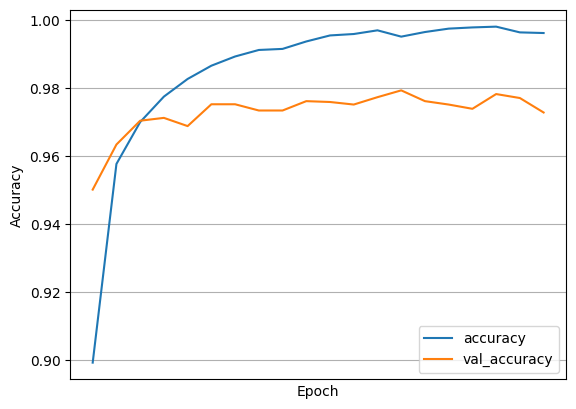

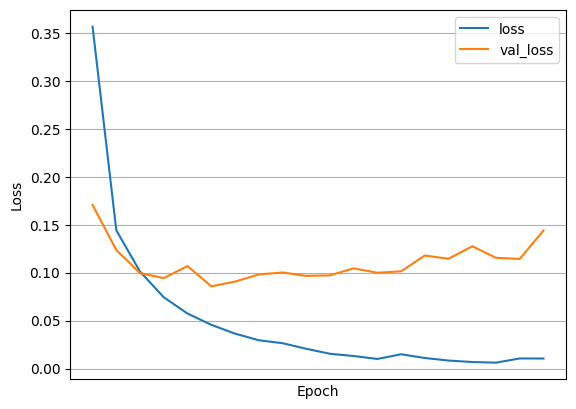

Best validation accuracy: 0.9793333411216736 at epoch 14


In [7]:
tf.keras.backend.clear_session()

model2 = keras.Sequential()
model2.add(keras.layers.Input(shape=(28, 28)))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Rescaling(1./255))

# Add more layers to the model
model2.add(keras.layers.Dense(128, activation='relu'))
model2.add(keras.layers.Dense(128, activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train for 20 epochs
hist = model2.fit(train_ds, validation_data=val_ds, epochs=20)

# Plot the training and validation accuracy on one graph and training and validation loss on another graph
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([])
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([])
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Print the best validation accuracy
print('Best validation accuracy:', max(hist.history['val_accuracy']), 'at epoch', np.argmax(hist.history['val_accuracy']) + 1)

Maybe it's overfitting, but I think I can still go bigger. I'll double the number of units in the layers and add a stable kernel initializer for relu.

Epoch 1/20


2025-01-28 09:16:16.161204: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_136', 32 bytes spill stores, 32 bytes spill loads

2025-01-28 09:16:16.348996: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_136', 300 bytes spill stores, 300 bytes spill loads

2025-01-28 09:16:16.603958: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_136_0', 820 bytes spill stores, 852 bytes spill loads

2025-01-28 09:16:16.687326: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_136', 8 bytes spill stores, 8 bytes spill loads

2025-01-28 09:16:16.938111: I external/local_xla/xla/stream_

338/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8415 - loss: 0.5399

2025-01-28 09:16:21.711585: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_36', 32 bytes spill stores, 32 bytes spill loads

2025-01-28 09:16:21.811548: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_36', 44 bytes spill stores, 44 bytes spill loads

2025-01-28 09:16:21.813253: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_36', 300 bytes spill stores, 300 bytes spill loads

2025-01-28 09:16:22.198374: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_36_0', 1072 bytes spill stores, 852 bytes spill loads

2025-01-28 09:16:22.311262: I external/local_xla/xla/stream_e

375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8490 - loss: 0.5146 - val_accuracy: 0.9608 - val_loss: 0.1357
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9636 - loss: 0.1198 - val_accuracy: 0.9683 - val_loss: 0.1029
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9784 - loss: 0.0721 - val_accuracy: 0.9738 - val_loss: 0.0900
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9849 - loss: 0.0485 - val_accuracy: 0.9772 - val_loss: 0.0776
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9895 - loss: 0.0342 - val_accuracy: 0.9753 - val_loss: 0.0841
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9930 - loss: 0.0229 - val_accuracy: 0.9761 - val_loss: 0.0855
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9933 - loss: 0.0216 - val_accuracy: 0.9783 - val_loss: 0.0877
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9949 - loss: 0.0160 - val_accuracy: 0.9760 - val_

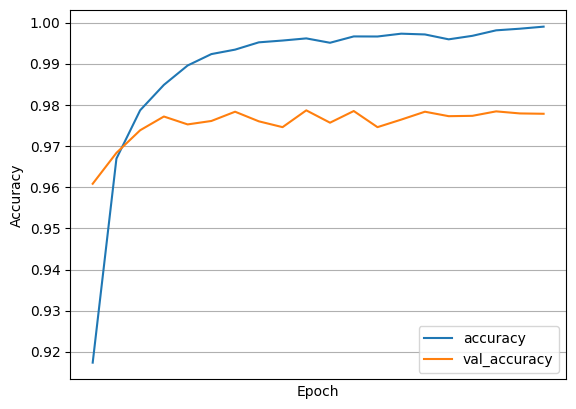

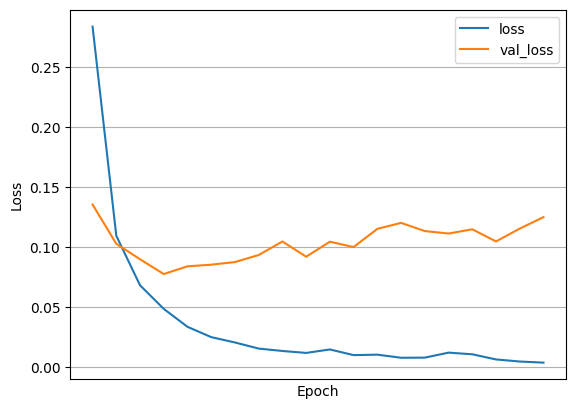

Best validation accuracy: 0.9786666631698608 at epoch 10


In [8]:
tf.keras.backend.clear_session()

model3 = keras.Sequential()
model3.add(keras.layers.Input(shape=(28, 28)))
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Rescaling(1./255))

# Add more units to the layers and he normal initialization
model3.add(keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal'))
model3.add(keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal'))
model3.add(keras.layers.Dense(10, activation='softmax'))

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = model3.fit(train_ds, validation_data=val_ds, epochs=20)

# Plot the training and validation accuracy on one graph and training and validation loss on another graph
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([])
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([])
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Print the best validation accuracy
print('Best validation accuracy:', max(hist.history['val_accuracy']), 'at epoch', np.argmax(hist.history['val_accuracy']) + 1)

Accuracy is still getting better so lets make the model more powerful until it overfits.

Epoch 1/20


2025-01-28 09:16:36.371523: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_136', 32 bytes spill stores, 32 bytes spill loads

2025-01-28 09:16:36.380420: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_136', 8 bytes spill stores, 8 bytes spill loads

2025-01-28 09:16:36.469158: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_136', 300 bytes spill stores, 300 bytes spill loads

2025-01-28 09:16:36.560160: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_136', 8 bytes spill stores, 8 bytes spill loads

2025-01-28 09:16:36.668062: I external/local_xla/xla/stream_execut

354/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.8713 - loss: 0.4404

2025-01-28 09:16:42.318701: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_36', 32 bytes spill stores, 32 bytes spill loads

2025-01-28 09:16:42.476960: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_36', 8 bytes spill stores, 8 bytes spill loads

2025-01-28 09:16:42.630181: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_36', 8 bytes spill stores, 8 bytes spill loads

2025-01-28 09:16:42.678109: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_36', 44 bytes spill stores, 44 bytes spill loads

2025-01-28 09:16:43.003532: I external/local_xla/xla/stream_executor/cud

375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8747 - loss: 0.4286 - val_accuracy: 0.9664 - val_loss: 0.1156
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9720 - loss: 0.0935 - val_accuracy: 0.9736 - val_loss: 0.0948
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9838 - loss: 0.0535 - val_accuracy: 0.9739 - val_loss: 0.0841
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9887 - loss: 0.0359 - val_accuracy: 0.9768 - val_loss: 0.0832
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9911 - loss: 0.0270 - val_accuracy: 0.9772 - val_loss: 0.0862
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9939 - loss: 0.0179 - val_accuracy: 0.9762 - val_loss: 0.0942
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9937 - loss: 0.0188 - val_accuracy: 0.9793 - val_loss: 0.0885
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9953 - loss: 0.0132 - val_accuracy: 0.9777 - va

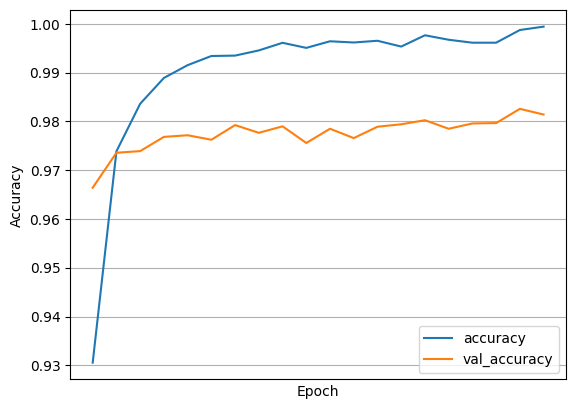

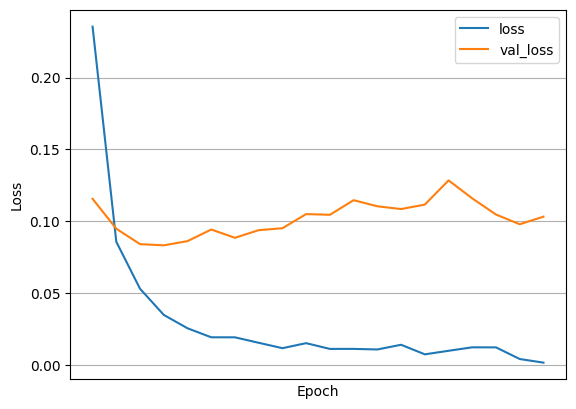

Best validation accuracy: 0.9825833439826965 at epoch 19


In [9]:
tf.keras.backend.clear_session()

model4 = keras.Sequential()
model4.add(keras.layers.Input(shape=(28, 28)))
model4.add(keras.layers.Flatten())
model4.add(keras.layers.Rescaling(1./255))

# Add more units to the layers
model4.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
model4.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
model4.add(keras.layers.Dense(10, activation='softmax'))

model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = model4.fit(train_ds, validation_data=val_ds, epochs=20)

# Plot the training and validation accuracy on one graph and training and validation loss on another graph
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([])
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([])
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Print the best validation accuracy
print('Best validation accuracy:', max(hist.history['val_accuracy']), 'at epoch', np.argmax(hist.history['val_accuracy']) + 1)

Still getting better, more power.

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8742 - loss: 0.4119 - val_accuracy: 0.9622 - val_loss: 0.1243
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9730 - loss: 0.0884 - val_accuracy: 0.9700 - val_loss: 0.0989
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9817 - loss: 0.0581 - val_accuracy: 0.9708 - val_loss: 0.0982
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9856 - loss: 0.0442 - val_accuracy: 0.9723 - val_loss: 0.0949
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9909 - loss: 0.0286 - val_accuracy: 0.9742 - val_loss: 0.0922
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9920 - loss: 0.0240 - val_accuracy: 0.9762 - val_loss: 0.0958
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9916 - loss: 0.0256 - val_accuracy: 0.9778 - val_loss: 0.0895
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9947 - loss: 0.0167 - val_accuracy: 0.

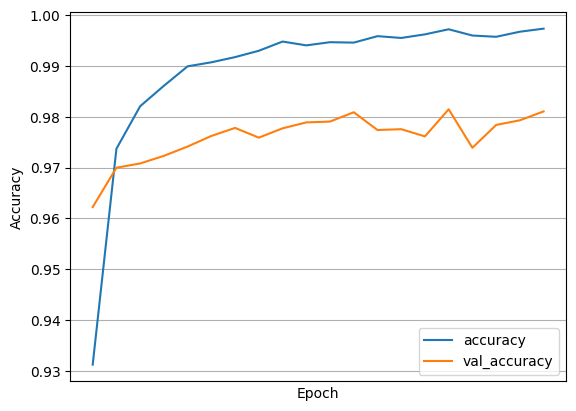

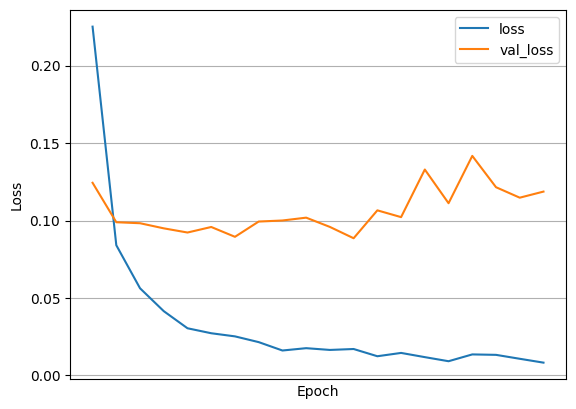

Best validation accuracy: 0.9815000295639038 at epoch 16


In [10]:
tf.keras.backend.clear_session()

model5 = keras.Sequential()
model5.add(keras.layers.Input(shape=(28, 28)))
model5.add(keras.layers.Flatten())
model5.add(keras.layers.Rescaling(1./255))

# Add another layer to the model
model5.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
model5.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
model5.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
model5.add(keras.layers.Dense(10, activation='softmax'))

model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = model5.fit(train_ds, validation_data=val_ds, epochs=20)

# Plot the training and validation accuracy on one graph and training and validation loss on another graph
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([])
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([])
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Print the best validation accuracy
print('Best validation accuracy:', max(hist.history['val_accuracy']), 'at epoch', np.argmax(hist.history['val_accuracy']) + 1)

Accuracy dropped slightly. I'll add some regularization.

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8461 - loss: 10.7158 - val_accuracy: 0.9298 - val_loss: 0.6638
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9194 - loss: 0.6473 - val_accuracy: 0.9364 - val_loss: 0.5546
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9287 - loss: 0.5632 - val_accuracy: 0.9411 - val_loss: 0.5110
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9392 - loss: 0.5021 - val_accuracy: 0.9414 - val_loss: 0.4724
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9405 - loss: 0.4764 - val_accuracy: 0.9457 - val_loss: 0.4411
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9484 - loss: 0.4349 - val_accuracy: 0.9420 - val_loss: 0.4361
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9492 - loss: 0.4158 - val_accuracy: 0.9562 - val_loss: 0.3903
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9533 - loss: 0.3983 - val_accuracy: 0

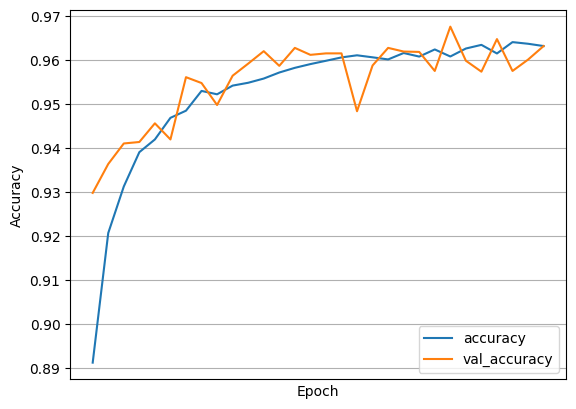

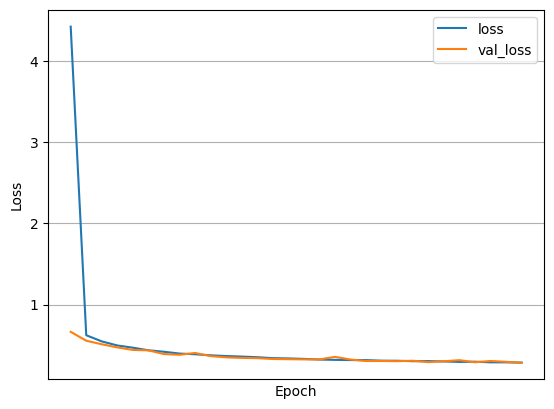

Best validation accuracy: 0.9676666855812073 at epoch 24


In [11]:
tf.keras.backend.clear_session()

model6 = keras.Sequential()
model6.add(keras.layers.Input(shape=(28, 28)))
model6.add(keras.layers.Flatten())
model6.add(keras.layers.Rescaling(1./255))

# Add L2 regularization to the model
model6.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.l2(0.01)))
model6.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.l2(0.01)))
model6.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.l2(0.01)))
model6.add(keras.layers.Dense(10, activation='softmax'))

model6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train longer
hist = model6.fit(train_ds, validation_data=val_ds, epochs=30)

# Plot the training and validation accuracy on one graph and training and validation loss on another graph
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([])
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([])
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Print the best validation accuracy
print('Best validation accuracy:', max(hist.history['val_accuracy']), 'at epoch', np.argmax(hist.history['val_accuracy']) + 1)

Well, that didn't work. How about dropout?

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7086 - loss: 0.8901 - val_accuracy: 0.9542 - val_loss: 0.1528
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9289 - loss: 0.2473 - val_accuracy: 0.9628 - val_loss: 0.1250
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9445 - loss: 0.1857 - val_accuracy: 0.9712 - val_loss: 0.0982
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9548 - loss: 0.1534 - val_accuracy: 0.9738 - val_loss: 0.0913
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9606 - loss: 0.1335 - val_accuracy: 0.9741 - val_loss: 0.0849
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9656 - loss: 0.1153 - val_accuracy: 0.9766 - val_loss: 0.0814
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9680 - loss: 0.1054 - val_accuracy: 0.9768 - val_loss: 0.0821
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9698 - loss: 0.1008 - val_accuracy: 0.

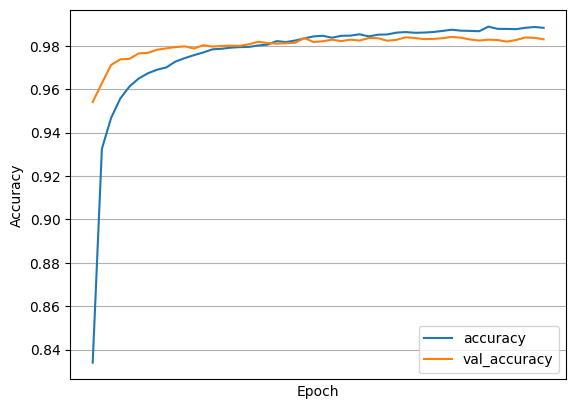

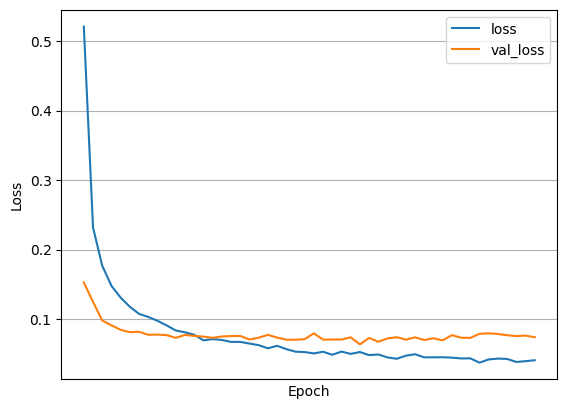

Best validation accuracy: 0.98416668176651 at epoch 40


In [12]:
tf.keras.backend.clear_session()

model7 = keras.Sequential()
model7.add(keras.layers.Input(shape=(28, 28)))
model7.add(keras.layers.Flatten())
model7.add(keras.layers.Rescaling(1./255))

# Use dropout instead of L2 regularization
model7.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
model7.add(keras.layers.Dropout(0.5))
model7.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
model7.add(keras.layers.Dropout(0.5))
model7.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
model7.add(keras.layers.Dropout(0.5))
model7.add(keras.layers.Dense(10, activation='softmax'))

model7.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train longer
hist = model7.fit(train_ds, validation_data=val_ds, epochs=50)

# Plot the training and validation accuracy on one graph and training and validation loss on another graph
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([])
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([])
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Print the best validation accuracy
print('Best validation accuracy:', max(hist.history['val_accuracy']), 'at epoch', np.argmax(hist.history['val_accuracy']) + 1)

That's the best model yet. Now I'll train a final model with early stopping and evaluate on the test set.

## Train the final model and evaluate on the test set

In [13]:
tf.keras.backend.clear_session()

final_model = keras.Sequential()
final_model.add(keras.layers.Input(shape=(28, 28)))
final_model.add(keras.layers.Flatten())
final_model.add(keras.layers.Rescaling(1./255))

final_model.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
final_model.add(keras.layers.Dropout(0.5))
final_model.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
final_model.add(keras.layers.Dropout(0.5))
final_model.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
final_model.add(keras.layers.Dropout(0.5))
final_model.add(keras.layers.Dense(10, activation='softmax'))

final_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = final_model.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[keras.callbacks.EarlyStopping('val_accuracy', patience=10, restore_best_weights=True)])

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6857 - loss: 0.9438 - val_accuracy: 0.9567 - val_loss: 0.1496
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9278 - loss: 0.2436 - val_accuracy: 0.9660 - val_loss: 0.1160
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9461 - loss: 0.1847 - val_accuracy: 0.9704 - val_loss: 0.0983
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9559 - loss: 0.1453 - val_accuracy: 0.9722 - val_loss: 0.0907
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9628 - loss: 0.1311 - val_accuracy: 0.9718 - val_loss: 0.0950
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9632 - loss: 0.1211 - val_accuracy: 0.9728 - val_loss: 0.0889
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9678 - loss: 0.1087 - val_accuracy: 0.9763 - val_loss: 0.0829
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9706 - loss: 0.1037 - val_accu

Continue training with a lower learning rate.

In [14]:
final_model.compile(optimizer=keras.optimizers.Adam(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
final_model.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[keras.callbacks.EarlyStopping('val_accuracy', patience=10, restore_best_weights=True)])

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9861 - loss: 0.0468 - val_accuracy: 0.9834 - val_loss: 0.0746
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9880 - loss: 0.0393 - val_accuracy: 0.9834 - val_loss: 0.0748
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9903 - loss: 0.0299 - val_accuracy: 0.9849 - val_loss: 0.0727
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9911 - loss: 0.0299 - val_accuracy: 0.9838 - val_loss: 0.0727
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9917 - loss: 0.0270 - val_accuracy: 0.9842 - val_loss: 0.0721
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9919 - loss: 0.0266 - val_accuracy: 0.9838 - val_loss: 0.0727
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9926 - loss: 0.0239 - val_accuracy: 0.9838 - val_loss: 0.0734
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9923 - loss: 0.0234 - val_accu

One more time.

In [15]:
final_model.compile(optimizer=keras.optimizers.Adam(0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
final_model.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[keras.callbacks.EarlyStopping('val_accuracy', patience=10, restore_best_weights=True)])

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9922 - loss: 0.0288 - val_accuracy: 0.9841 - val_loss: 0.0734
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9919 - loss: 0.0282 - val_accuracy: 0.9838 - val_loss: 0.0735
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9912 - loss: 0.0264 - val_accuracy: 0.9841 - val_loss: 0.0736
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9913 - loss: 0.0284 - val_accuracy: 0.9838 - val_loss: 0.0738
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9920 - loss: 0.0266 - val_accuracy: 0.9839 - val_loss: 0.0739
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9910 - loss: 0.0300 - val_accuracy: 0.9838 - val_loss: 0.0739
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9917 - loss: 0.0284 - val_accuracy: 0.9841 - val_loss: 0.0737
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9911 - loss: 0.0268 - val_accu

In [17]:
_, accuracy = final_model.evaluate(test_ds)
print(f'Test accuracy: {accuracy * 100:.2f}%')

 1/79 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 7.6345e-04

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9808 - loss: 0.0801   
Test accuracy: 98.32%


### Comment on which techniques/methods you used to build the best model with the highest accuracy.  

I grew the model until it that started reducing performance, which indicated overfitting. Once the model was overfitting I implemented some regularization techniques to reduce the overfitting and get the best fitting model possible. Then I continued traing the final model with a lower learning rate.